In [1]:
#loading all the necessary packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data
df = pd.read_csv("RR.csv")
df.columns = df.columns.str.strip().str.replace('\n', '').str.replace(' ', '_')

In [3]:
df.head()

,Age,Gender,Occupation,Income,Location,Frequency,Top3_factors,Brands,Familiarity,frequently_purchased,Taste,Price,Packaging,Availability,Quality,USP,improvements,Availability,Switching,Choosing_MM
0,18-25,Male,Working Professional,"Above ?1,00,000",Urban,2-3 times a week,"2, 3","1, 2, 5",1,4,4,4,3,4,3,1,Improved taste,1.0,3,2
1,18-25,Female,Student,"Below ?20,000",Urban,Weekly,"3, 6",1,1,"1, 2, 3, 4, 4, 5",5,4,4,5,5,1,New product varieties,3.0,2,3
2,18-25,Male,Student,"Below ?20,000",Urban,Occasionally,2,"2, 3",3,4,4,4,5,1,4,2,Better availability in stores,4.0,1,4
3,18-25,Female,Student,"Above ?1,00,000",Urban,Daily,"1, 2, 3","2, 3",1,3,4,4,4,4,4,3,Improved packaging,2.0,1,5
4,36-45,Male,Working Professional,"?50,000 - ?1,00,000",Urban,Daily,"1, 2, 3, 4, 6","1, 2, 3, 4",2,4,5,1,4,5,5,2,Lower price,1.0,1,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   260 non-null    object 
 1   Gender                260 non-null    object 
 2   Occupation            260 non-null    object 
 3   Income                260 non-null    object 
 4   Location              260 non-null    object 
 5   Frequency             260 non-null    object 
 6   Top3_factors          260 non-null    object 
 7   Brands                260 non-null    object 
 8   Familiarity           260 non-null    int64  
 9   frequently_purchased  260 non-null    object 
 10  Taste                 260 non-null    int64  
 11  Price                 260 non-null    int64  
 12  Packaging             260 non-null    int64  
 13  Availability          260 non-null    int64  
 14  Quality               260 non-null    int64  
 15  USP                   2

In [9]:
df.shape

(260, 20)

In [11]:
df.describe()

,Familiarity,Taste,Price,Packaging,Availability,Quality,USP,Availability,Switching,Choosing_MM
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,259.000000,260.000000,260.000000
mean,1.057692,4.900000,4.153846,4.534615,4.169231,4.903846,2.023077,1.594595,1.076923,3.830769
std,0.292339,0.462493,0.993893,0.610995,1.010665,0.433163,0.402029,0.537120,0.294490,0.610569
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,5.000000,3.000000,4.000000,3.000000,5.000000,2.000000,1.000000,1.000000,4.000000
50%,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,2.000000,1.000000,4.000000
75%,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,2.000000,1.000000,4.000000
max,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000,5.000000


In [13]:
df.describe(include = object)

,Age,Gender,Occupation,Income,Location,Frequency,Top3_factors,Brands,frequently_purchased,improvements
count,260,260,260,260,260,260,260,260,260,260
unique,4,2,3,4,2,4,24,13,16,7
top,26-35,Male,Working Professional,"?50,000 - ?1,00,000",Urban,Daily,"1, 2, 3, 4, 6","1, 2, 3, 5","1, 3, 4, 4",Better availability in stores
freq,223,153,232,140,259,252,134,134,132,141


In [15]:
#this is to change the type of the variable from object to numerical
#, so that it can understand the data.
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce')
df['Occupation'] = pd.to_numeric(df['Occupation'], errors='coerce')
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
df['Location'] = pd.to_numeric(df['Location'], errors='coerce')
df['Frequency'] = pd.to_numeric(df['Frequency'], errors='coerce')
df['Top3_factors'] = pd.to_numeric(df['Top3_factors'], errors='coerce')
df['Brands'] = pd.to_numeric(df['Brands'], errors='coerce')
df['frequently_purchased'] = pd.to_numeric(df['frequently_purchased'], errors='coerce')
df['improvements'] = pd.to_numeric(df['improvements'], errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   0 non-null      float64
 1   Gender                0 non-null      float64
 2   Occupation            0 non-null      float64
 3   Income                0 non-null      float64
 4   Location              0 non-null      float64
 5   Frequency             0 non-null      float64
 6   Top3_factors          4 non-null      float64
 7   Brands                8 non-null      float64
 8   Familiarity           260 non-null    int64  
 9   frequently_purchased  14 non-null     float64
 10  Taste                 260 non-null    int64  
 11  Price                 260 non-null    int64  
 12  Packaging             260 non-null    int64  
 13  Availability          260 non-null    int64  
 14  Quality               260 non-null    int64  
 15  USP                   2

In [19]:
df.describe()

,Age,Gender,Occupation,Income,Location,Frequency,Top3_factors,Brands,Familiarity,frequently_purchased,Taste,Price,Packaging,Availability,Quality,USP,improvements,Availability,Switching,Choosing_MM
count,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,8.000000,260.000000,14.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,0.0,259.000000,260.000000,260.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.250000,2.375000,1.057692,1.857143,4.900000,4.153846,4.534615,4.169231,4.903846,2.023077,NaN,1.594595,1.076923,3.830769
std,NaN,NaN,NaN,NaN,NaN,NaN,2.217356,0.916125,0.292339,1.292412,0.462493,0.993893,0.610995,1.010665,0.433163,0.402029,NaN,0.537120,0.294490,0.610569
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.750000,1.750000,1.000000,1.000000,5.000000,3.000000,4.000000,3.000000,5.000000,2.000000,NaN,1.000000,1.000000,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,NaN,2.000000,1.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,3.000000,1.000000,2.750000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,NaN,2.000000,1.000000,4.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,4.000000,3.000000,5.000000


In [21]:
df

,Age,Gender,Occupation,Income,Location,Frequency,Top3_factors,Brands,Familiarity,frequently_purchased,Taste,Price,Packaging,Availability,Quality,USP,improvements,Availability,Switching,Choosing_MM
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.0,4,4,3,4,3,1,NaN,1.0,3,2
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,5,4,4,5,5,1,NaN,3.0,2,3
2,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3,4.0,4,4,5,1,4,2,NaN,4.0,1,4
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,4,4,4,4,4,3,NaN,2.0,1,5
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4.0,5,1,4,5,5,2,NaN,1.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,5,3,4,3,5,2,NaN,1.0,1,4
256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,5,3,4,3,5,2,NaN,1.0,1,4
257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,5,3,4,3,5,2,NaN,1.0,1,4
258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,5,3,4,3,5,2,NaN,1.0,1,4


In [23]:
#to find if tehre are any missing values in the data set given.
Total = df.isnull().sum().sort_values(ascending = False)          
Total


Age                     260
Occupation              260
Income                  260
Location                260
Frequency               260
Gender                  260
improvements            260
Top3_factors            256
Brands                  252
frequently_purchased    246
Availability              1
Quality                   0
Switching                 0
USP                       0
Taste                     0
Availability              0
Packaging                 0
Price                     0
Familiarity               0
Choosing_MM               0
dtype: int64

In [25]:
#here we are deleting the rows with the missing values, so that data preporcessing will be done.
featuress = df.drop(['Age',"Occupation", 'Income', 'Location','Frequency','Gender','improvements','Top3_factors','Brands','frequently_purchased','Availability'], axis=1)

# head() to display top five rows
featuress.head()

,Familiarity,Taste,Price,Packaging,Quality,USP,Switching,Choosing_MM
0,1,4,4,3,3,1,3,2
1,1,5,4,4,5,1,2,3
2,3,4,4,5,4,2,1,4
3,1,4,4,4,4,3,1,5
4,2,5,1,4,5,2,1,4


In [27]:
data=featuress
data.head()

,Familiarity,Taste,Price,Packaging,Quality,USP,Switching,Choosing_MM
0,1,4,4,3,3,1,3,2
1,1,5,4,4,5,1,2,3
2,3,4,4,5,4,2,1,4
3,1,4,4,4,4,3,1,5
4,2,5,1,4,5,2,1,4


In [29]:
#here we calculated each data point's distance from the center by the meausre called eculidean distance. 
#and found the average of each data point.
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(featuress)       
featuress = scale.transform(featuress)   
featuress

array([[-0.19772819, -1.94972922, -0.15509003, ..., -2.54968994,
         6.54279903, -3.00424599],
       [-0.19772819,  0.21663658, -0.15509003, ..., -2.54968994,
         3.14054354, -1.36327129],
       [ 6.65684913, -1.94972922, -0.15509003, ..., -0.0575118 ,
        -0.26171196,  0.27770341],
       ...,
       [-0.19772819,  0.21663658, -1.1631752 , ..., -0.0575118 ,
        -0.26171196,  0.27770341],
       [-0.19772819,  0.21663658, -1.1631752 , ..., -0.0575118 ,
        -0.26171196,  0.27770341],
       [-0.19772819,  0.21663658, -1.1631752 , ..., -0.0575118 ,
        -0.26171196,  0.27770341]])

In [31]:
df.shape

(260, 20)

In [33]:
features_scaled = pd.DataFrame(featuress, columns= data.columns[:20])
features_scaled.head()

,Familiarity,Taste,Price,Packaging,Quality,USP,Switching,Choosing_MM
0,-0.197728,-1.949729,-0.155090,-2.516511,-4.403698,-2.549690,6.542799,-3.004246
1,-0.197728,0.216637,-0.155090,-0.876679,0.222409,-2.549690,3.140544,-1.363271
2,6.656849,-1.949729,-0.155090,0.763153,-2.090645,-0.057512,-0.261712,0.277703
3,-0.197728,-1.949729,-0.155090,-0.876679,-2.090645,2.434666,-0.261712,1.918678
4,3.229560,0.216637,-3.179346,-0.876679,0.222409,-0.057512,-0.261712,0.277703


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Scale the features
features = data.copy()
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 2: Finding the best number of clusters
n_clusters = range(2, 7)
silhouette_vals = []

for k in n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=10, n_init=10)  # Explicitly set n_init to suppress the warning
    labels = kmeans.fit_predict(features_scaled)
    score = silhouette_score(features_scaled, labels)  # Use the correct function
    silhouette_vals.append(score)
    print(f"For n_clusters = {k}, silhouette score is {score}")

For n_clusters = 2, silhouette score is 0.7560352487246088
For n_clusters = 3, silhouette score is 0.7382857876329662
For n_clusters = 4, silhouette score is 0.816267543694277
For n_clusters = 5, silhouette score is 0.8108946750671951
For n_clusters = 6, silhouette score is 0.8316267705001954


In [39]:
model = KMeans(n_clusters= 5, random_state= 10)
model.fit(features_scaled)
#and we got the optimal number of clusters as 5.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=10)

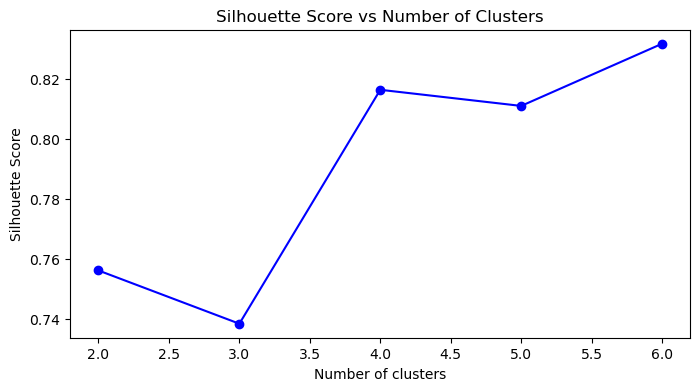

In [43]:
plt.figure(figsize=(8, 4))
plt.plot(list(n_clusters), silhouette_vals, 'bo-')  # Use silhouette_vals here
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

In [45]:

# here we are Fitting the model with best number of clusters
# (Suppose from above,i decided best k = 5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=10)
labels = kmeans.fit_predict(features_scaled)

# here we are Adding the cluster labels to the original data

data['Cluster'] = labels


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


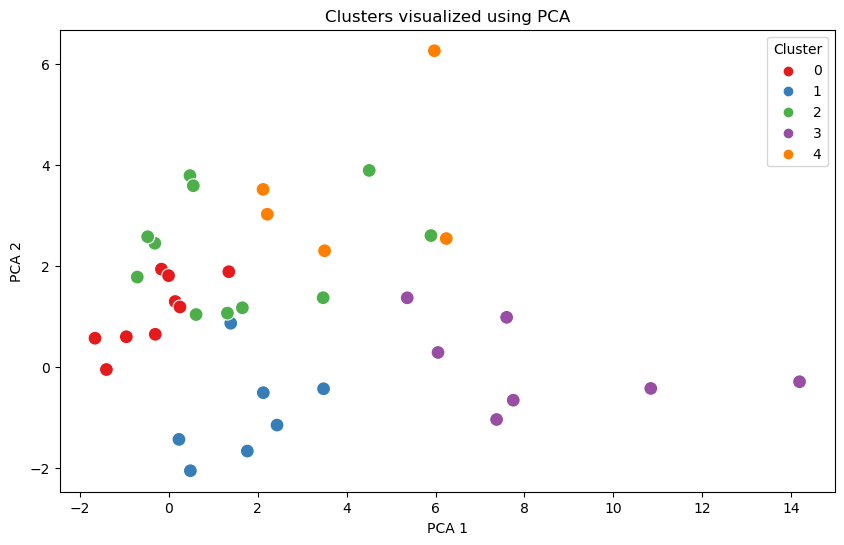

In [47]:

#here we Visualize the clusters using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=labels, palette='Set1', s=100)
plt.title('Clusters visualized using PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()


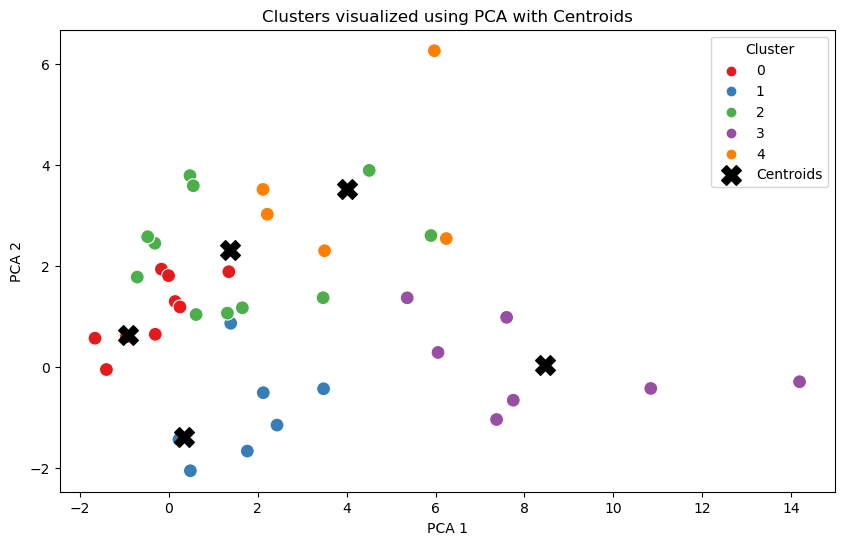

In [55]:
from sklearn.decomposition import PCA

optimal_k = 5  # Replace with the value you chose based on silhouette scores
kmeans = KMeans(n_clusters=optimal_k, random_state=10, n_init=10)
labels = kmeans.fit_predict(features_scaled)

# Perform PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

# Transform centroids into PCA space
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=labels, palette='Set1', s=100)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', s=200, marker='X', label='Centroids')
plt.title('Clusters visualized using PCA with Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

In [49]:

# here we are profiling each Cluster with actually what it means.
cluster_profile = data.groupby('Cluster').mean()

print("\nCluster Profile (mean values):")
print(cluster_profile)



Cluster Profile (mean values):
         Familiarity     Taste     Price  Packaging   Quality       USP  \
Cluster                                                                   
0           1.000000  5.000000  4.971429   5.000000  5.000000  2.000000   
1           1.020833  4.968750  3.000000   4.000000  4.968750  2.020833   
2           1.083333  4.666667  4.500000   4.416667  4.666667  1.166667   
3           1.571429  2.714286  2.857143   2.571429  2.714286  3.142857   
4           2.600000  4.400000  4.400000   4.800000  4.600000  3.200000   

         Switching  Choosing_MM  
Cluster                          
0         1.021429     3.964286  
1         1.000000     3.989583  
2         1.916667     2.166667  
3         1.428571     2.714286  
4         1.600000     2.600000  


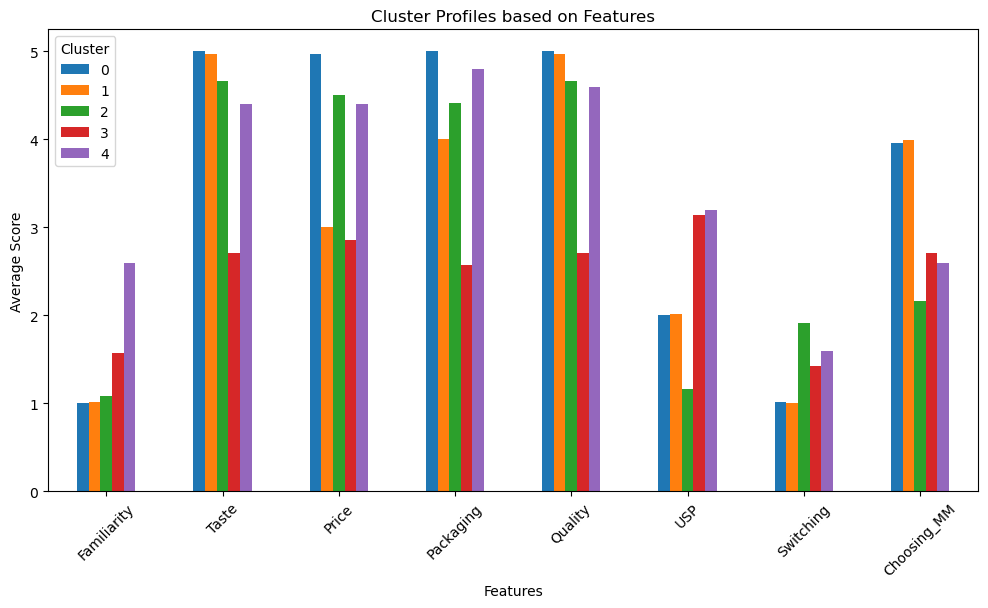

In [51]:

#this is the nice Visualization of cluster profiles.
cluster_profile.T.plot(kind='bar', figsize=(12,6))
plt.title('Cluster Profiles based on Features')
plt.ylabel('Average Score')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()